In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
new_pieman = niidb.FMriActivationsDb('data/new_pieman_word.db',
                                     mask='/home/eli/Documents/new_pieman/word/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(new_pieman.all(), mask='/home/eli/Documents/new_pieman/word/wholebrain.nii.gz', num_factors=15, embedding_dim=2)

04/30/2018 12:58:20 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-39-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
04/30/2018 12:58:24 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-45-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
04/30/2018 12:58:28 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-48-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
04/30/2018 12:58:32 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-11-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
04/30/2018 12:58:36 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-43-task-word.nii with mask /home/eli/Documents/new_pieman/word/wholebrain.nii.gz (zscore=True)
04/30/2018 12:58:40 Loading Nifti image /home/eli/Documents/new_pieman/word/sub-30-task-word.nii with mask /home/eli/Document

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


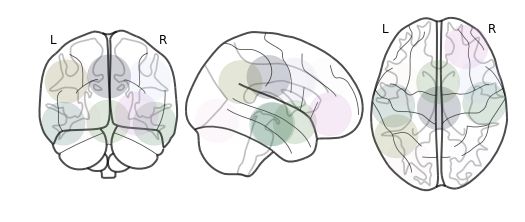

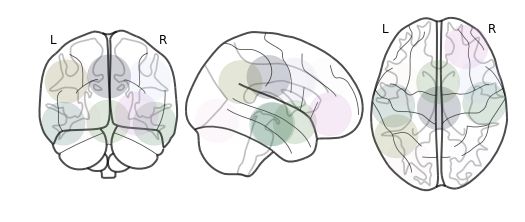

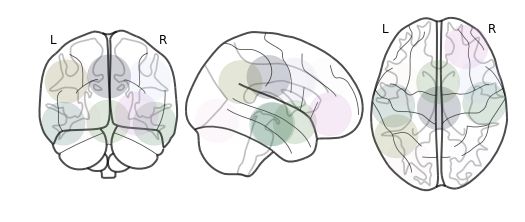

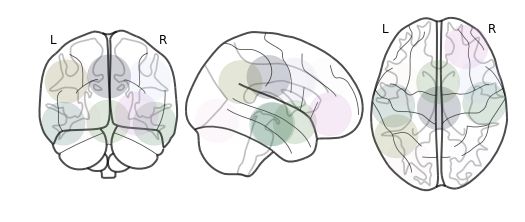

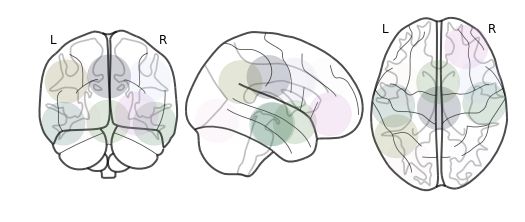

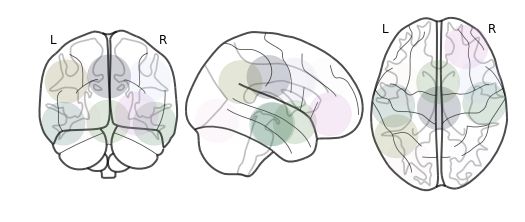

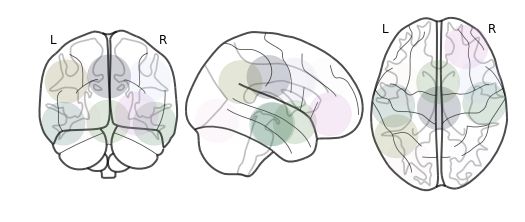

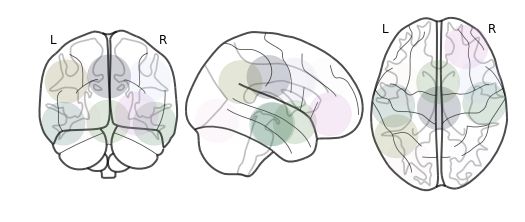

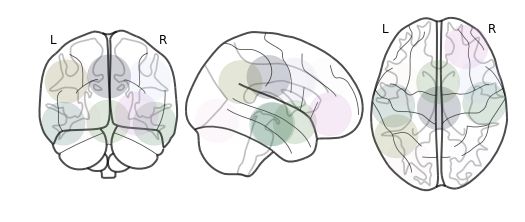

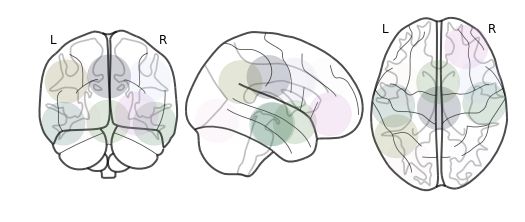

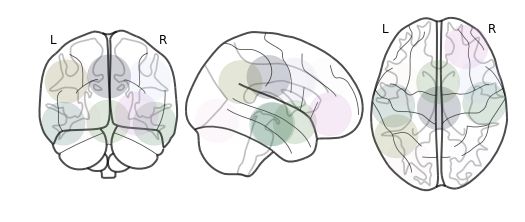

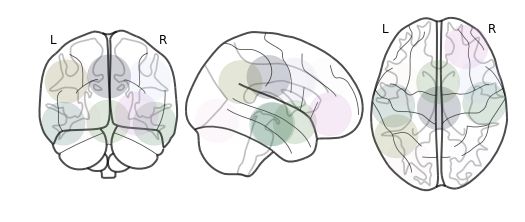

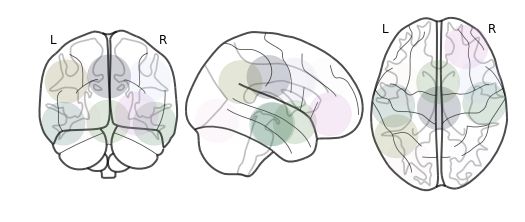

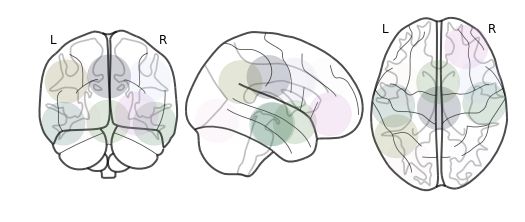

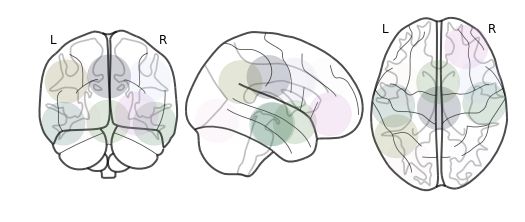

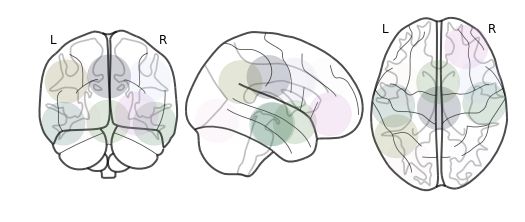

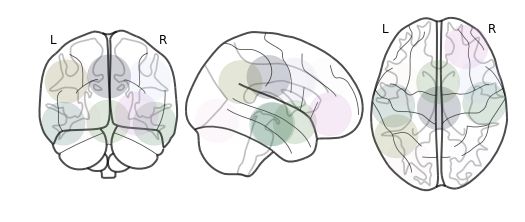

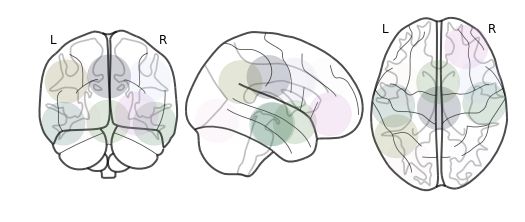

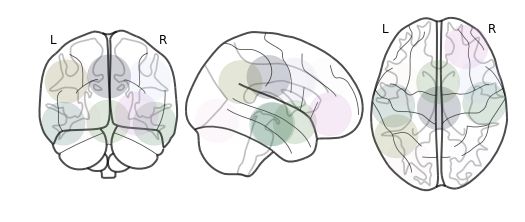

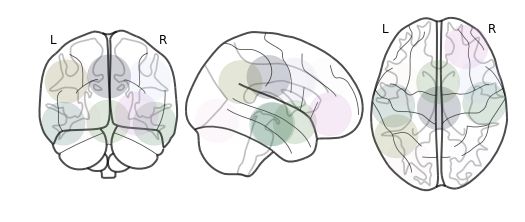

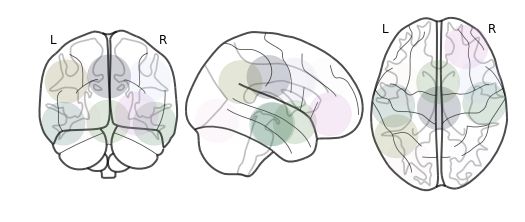

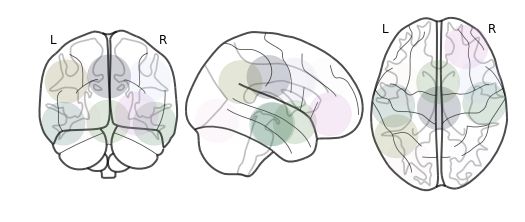

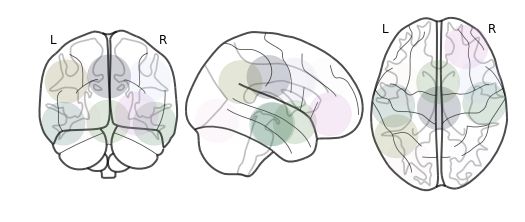

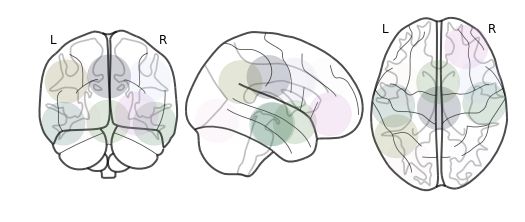

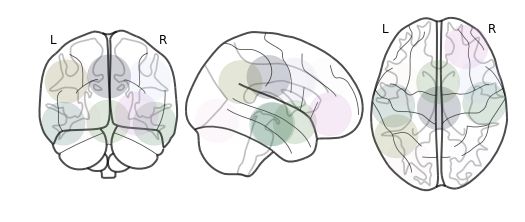

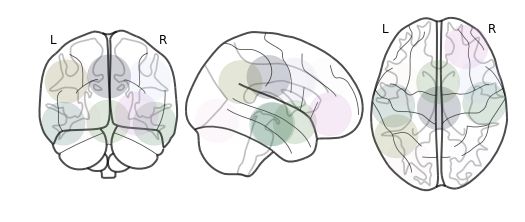

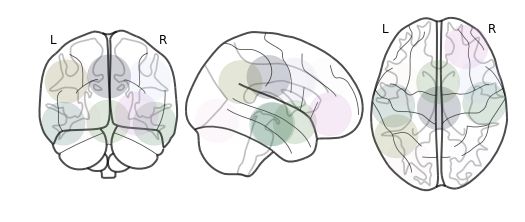

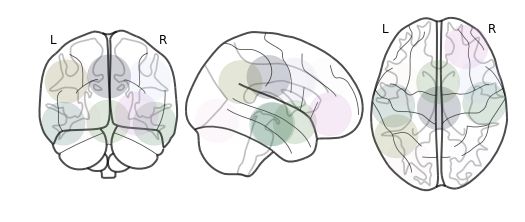

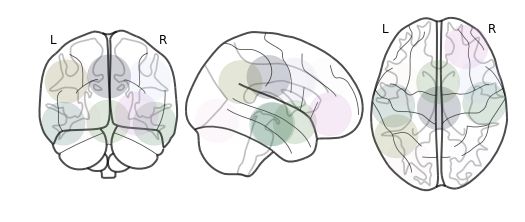

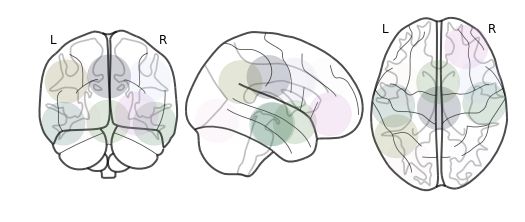

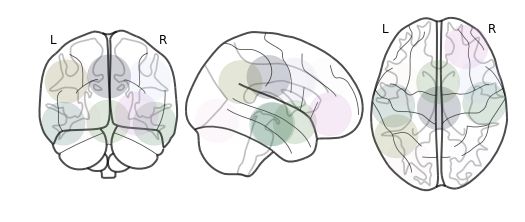

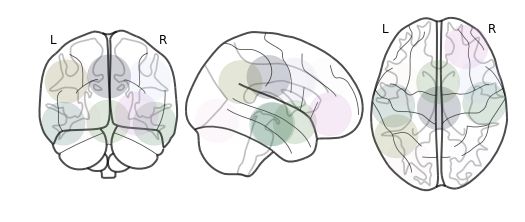

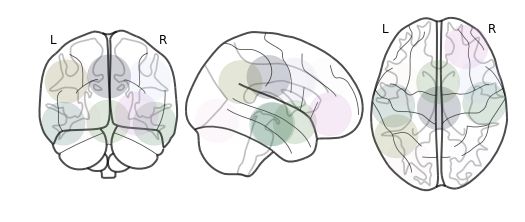

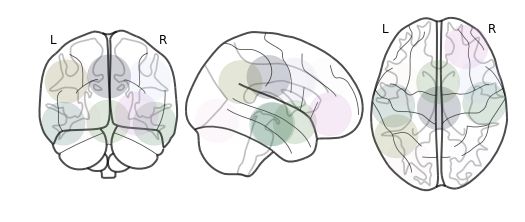

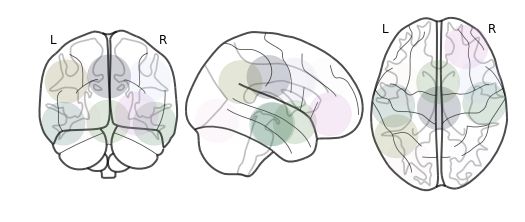

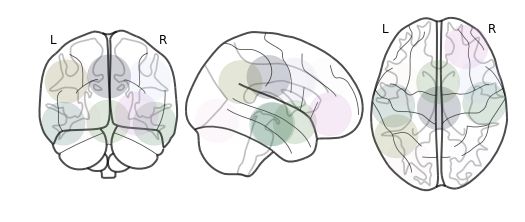

In [6]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)

In [7]:
losses = dtfa.train(num_steps=150, learning_rate=1e-1, log_level=logging.INFO, num_particles=2,
                    batch_size=128, use_cuda=True, checkpoint_steps=10, blocks_batch_size=4)

04/30/2018 13:01:18 [Epoch 1] (6583ms) Posterior free-energy 5.10434550e+10
04/30/2018 13:01:18 Saving checkpoint...
04/30/2018 13:01:24 [Epoch 2] (6516ms) Posterior free-energy 3.62217636e+10
04/30/2018 13:01:30 [Epoch 3] (6420ms) Posterior free-energy 3.55112591e+10
04/30/2018 13:01:37 [Epoch 4] (6429ms) Posterior free-energy 3.54166538e+10
04/30/2018 13:01:43 [Epoch 5] (6438ms) Posterior free-energy 3.53450762e+10
04/30/2018 13:01:50 [Epoch 6] (6420ms) Posterior free-energy 3.53242112e+10
04/30/2018 13:01:56 [Epoch 7] (6434ms) Posterior free-energy 3.52755671e+10
04/30/2018 13:02:03 [Epoch 8] (6497ms) Posterior free-energy 3.52472146e+10
04/30/2018 13:02:09 [Epoch 9] (6425ms) Posterior free-energy 3.52756818e+10
04/30/2018 13:02:16 [Epoch 10] (6484ms) Posterior free-energy 3.52480338e+10
04/30/2018 13:02:22 [Epoch 11] (6542ms) Posterior free-energy 3.52751002e+10
04/30/2018 13:02:22 Saving checkpoint...
04/30/2018 13:02:29 [Epoch 12] (6633ms) Posterior free-energy 3.51924060e+10
04/

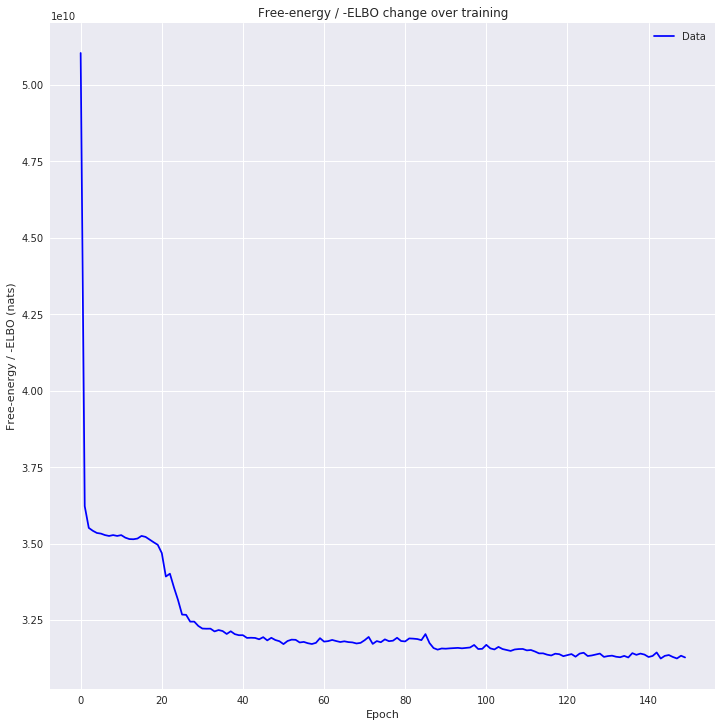

In [8]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


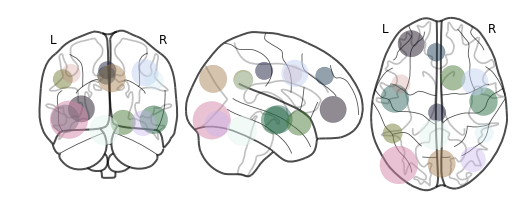

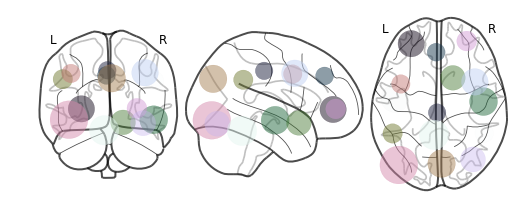

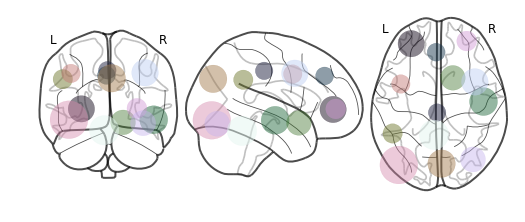

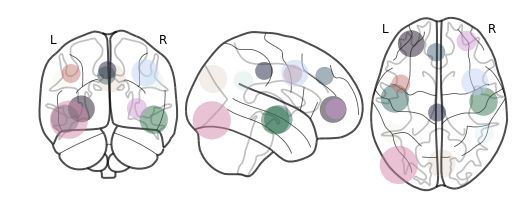

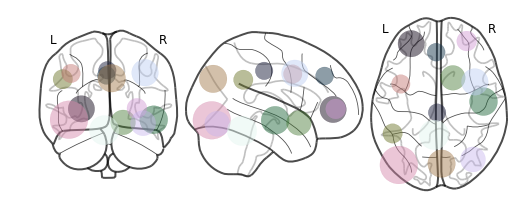

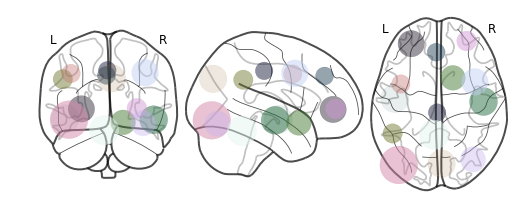

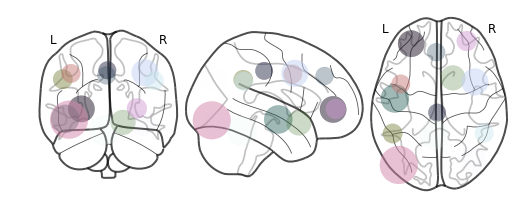

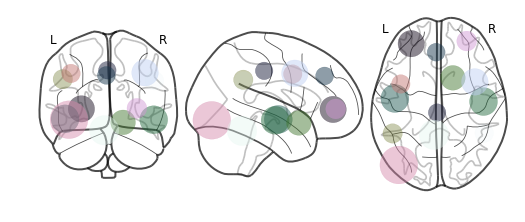

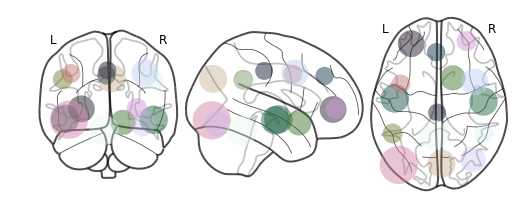

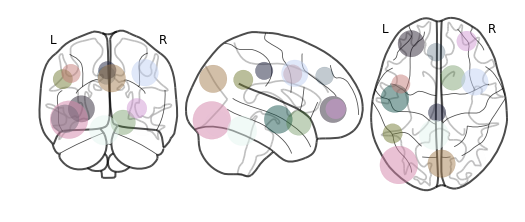

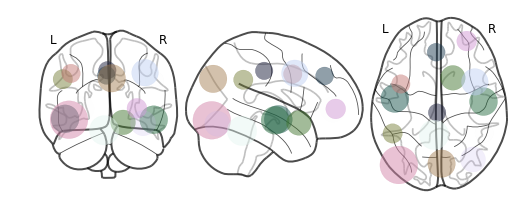

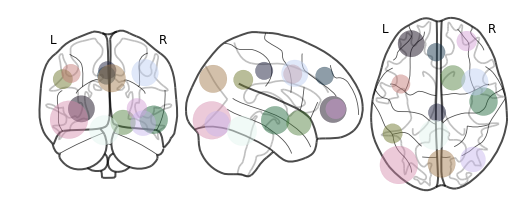

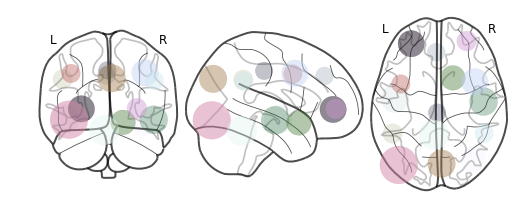

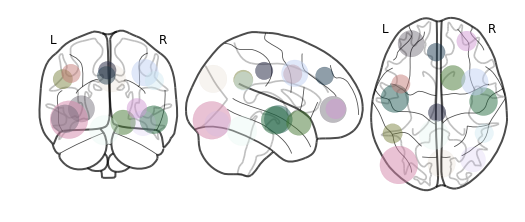

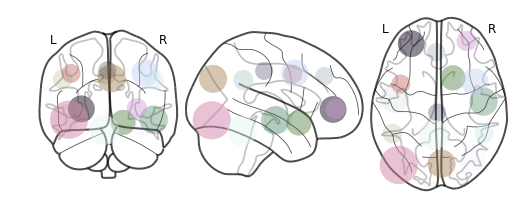

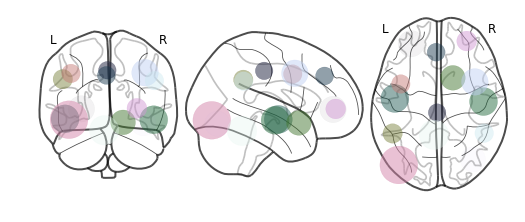

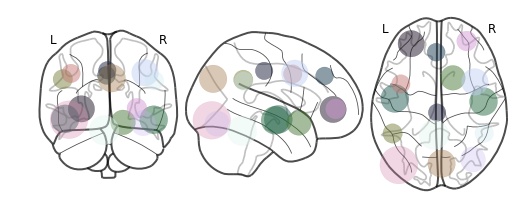

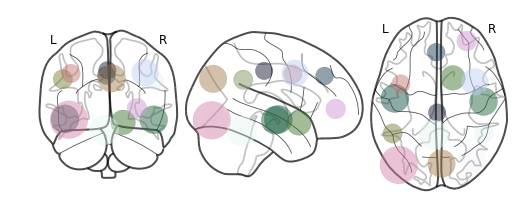

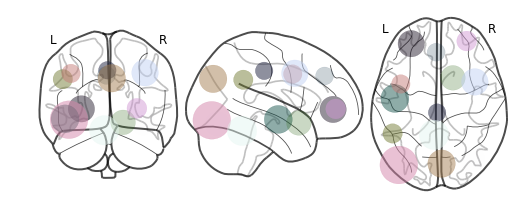

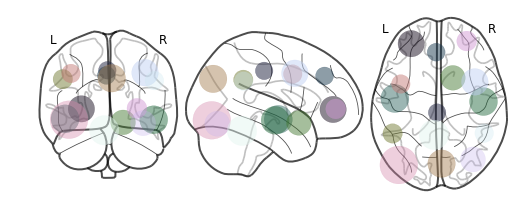

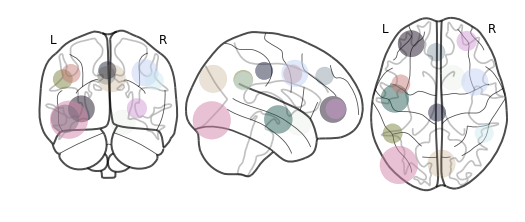

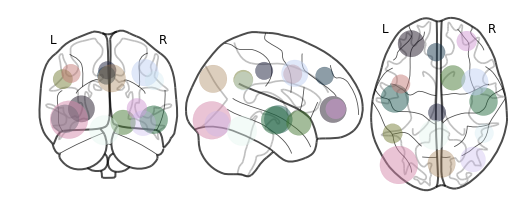

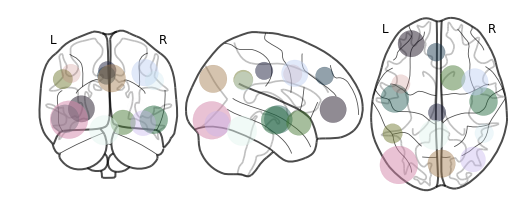

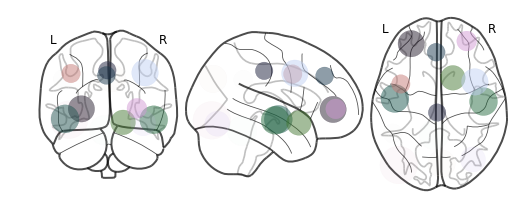

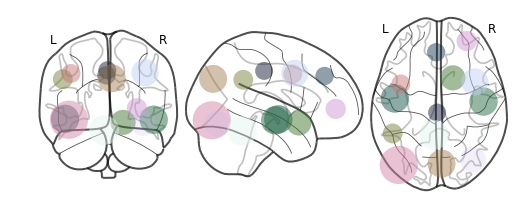

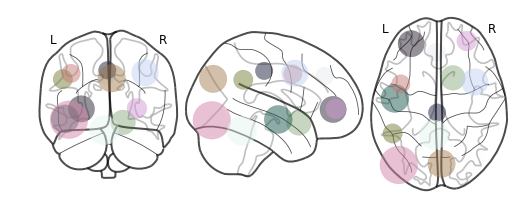

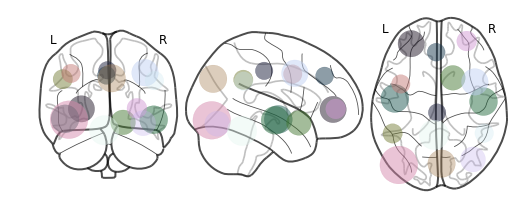

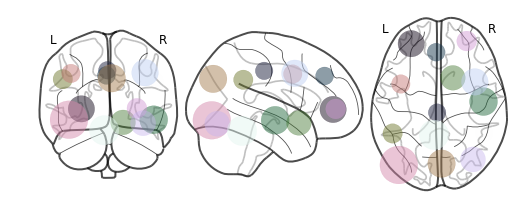

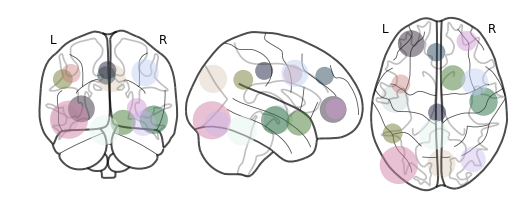

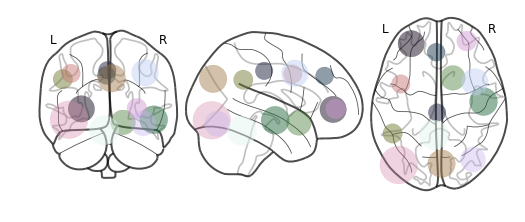

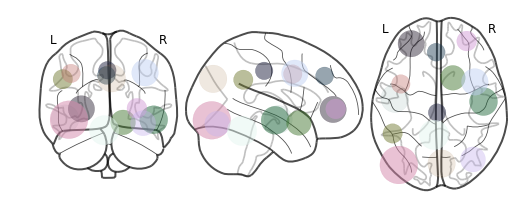

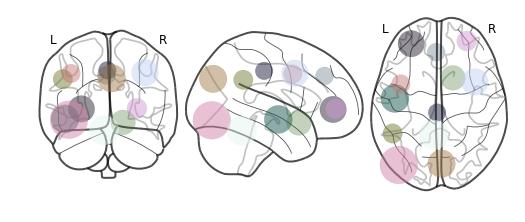

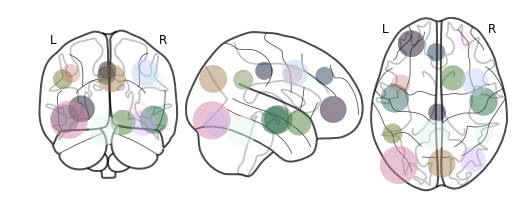

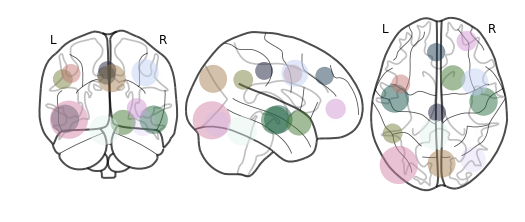

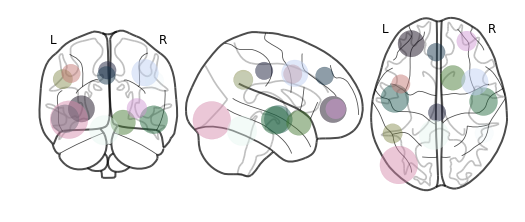

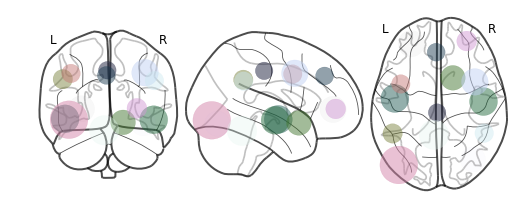

In [9]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)

In [10]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


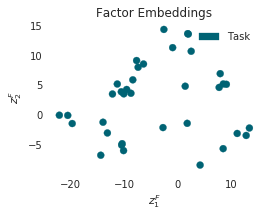

In [11]:
dtfa.scatter_factor_embedding(labeler=task_rest_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


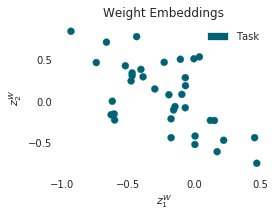

In [12]:
dtfa.scatter_weights_embedding(t=None, labeler=task_rest_labeler)